# Определение закономерностей успешности игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Задачи

1. Подготовить данные. Привести все названия к нижнему регистру, преобразовать данные в нужные типы, обработать пропуски, посчитать сумму продаж по всем регионам.
2. Исследовательский анализ данных. Посмотреть сколько игр выпускалось в разные годы. Как изменялись продажи по платформам. Определить какие платформы лидируют в продажах и построить графики распределения по годам.
3. Определить какие платформы лидируют в продажах, растут и падают.
4. Построить "ящик с усами" по глобальным продажам в разбивке по платформам.
5. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
6. Посмотреть на общее распределение игр по жанрам.
7. Составить портреты пользователей каждого региона продаж.
8. Проверить гипотезы. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action и Sports разные.

## Данные

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представленны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и необходимо спланироват кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 201-го или же 2027-й — по данным 2026 года.

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Подготовка данных

In [24]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from scipy import stats

data = pd.read_csv('/datasets/games.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


При первичной проверке данных в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating обнаруженны пропуски.
Year_of_Release	 в формате float64, User_Score в формате object.

### Пропуски и дубликаты

In [25]:
display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

print('Обаружено дубликатов:', data.duplicated().sum())

,"NaNs, %"
Name,0.01
Platform,0.00
Year_of_Release,1.61
Genre,0.01
NA_sales,0.00
EU_sales,0.00
JP_sales,0.00
Other_sales,0.00
Critic_Score,51.32
User_Score,40.09


Обаружено дубликатов: 0


### Замена названий столбцов

In [26]:
data = data.rename(
    columns = {
        'Name' : 'name',
        'Platform' : 'platform',
        'Year_of_Release' : 'year',
        'Genre' : 'genre',
        'NA_sales' : 'na_sales',
        'EU_sales' : 'eu_sales',
        'JP_sales' : 'jp_sales',
        'Other_sales' : 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score' : 'user_score',
        'Rating' : 'rating'
    }
)

Все столбцы приведены к нижнему регистру, Year_of_Release переименован в year для удобства дальнейшей работы.

### Обработка пропусков. Изменение типов.

In [27]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

data = data.dropna(subset = ['name', 'genre', 'year'])

data['year'] = data['year'].astype('int')
data['user_score'] = data['user_score'].astype('float')


#data['critic_score'].unique()
#data['user_score'].value_counts()
#data['rating'].value_counts()

#data['user_score'].isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В столбце user_score видим, что есть значение tbd, данная обривеатура обозначает, что оценка еще не определена, поэтому заменяем ее на значение NaN.
Пропуски в стобцах name, year и genre удаляем, т.к. эти данные не возможно определить даже предположительно, они составляют менее 2% всех данных.
Тип year заменяем на int, а user_score меняем на float.

### Сумма прожаж по всем регионам

In [28]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        9768 non-null   object 
 11  all_sales     16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Количество выпускаемых игр в разне годы

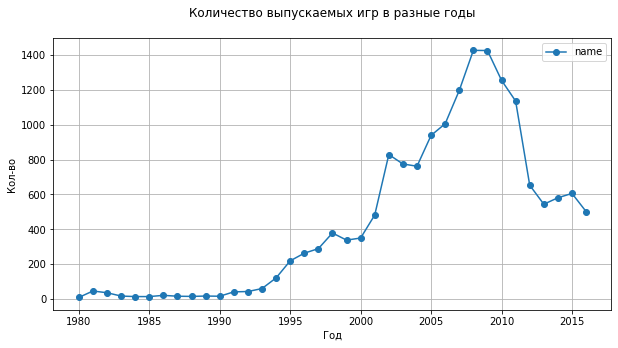

In [29]:
(data
 .pivot_table(index = 'year', values='name', aggfunc = 'count')
 .plot(grid = True, kind='line', figsize=(10,5),  style = 'o-')
)
plt.title('Количество выпускаемых игр в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Важны ли данные за все периоды?
На этапе исследовательского анализа считаю, что опираться необходимо на актуальный данные, т.к. данные прошлых лет могут искажены внешней обстановкой, экономической ситуацией и т.д.

### Продажи по лидирующим платформам

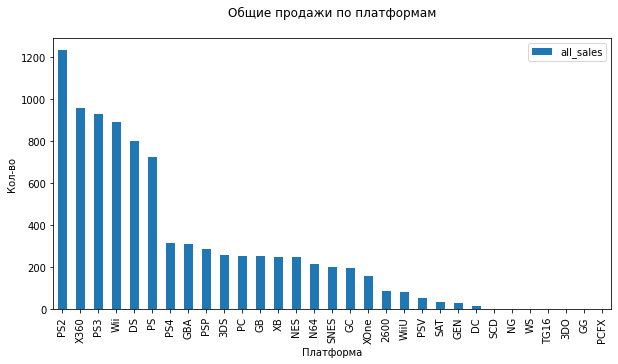

In [30]:
(data
 .pivot_table(index = 'platform', values='all_sales', aggfunc = 'sum')
 .sort_values(by = 'all_sales', ascending = False)
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Общие продажи по платформам'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Кол-во')
plt.show()

По графику видно, что за все периоды продаж лидируют платформы PS2, X360, PS3, Wii, DS, PS

#### Продажи DS

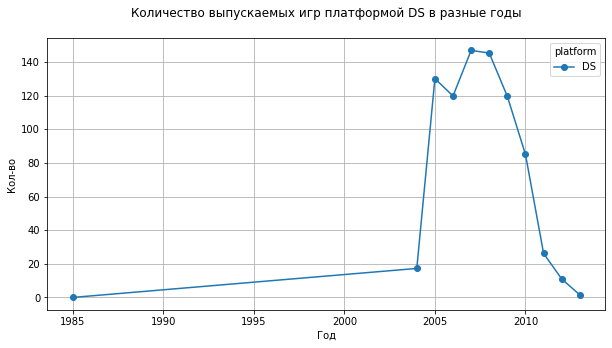

In [31]:
(data
 .query('platform == "DS"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'DS', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой DS в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Как видим на графике в последние 2-3 года продаж у компании нет. Так же в открытых источниках можно увидеть, что первый пуск продукта, данной игровой платформы вышел в 2004 году, в 1985 году DS еще не существовало, это ошибка данных.

#### Продажи PS

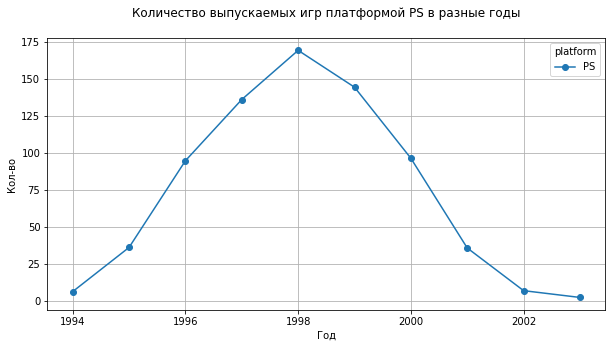

In [32]:
(data
 .query('platform == "PS"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'PS', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой PS в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Отсутствие продаж у платформы PS объясняется выходом в 2000 году PS2. По прошествию 3-4 лет, PS стала просто неактуальна.

#### Продажи PS2

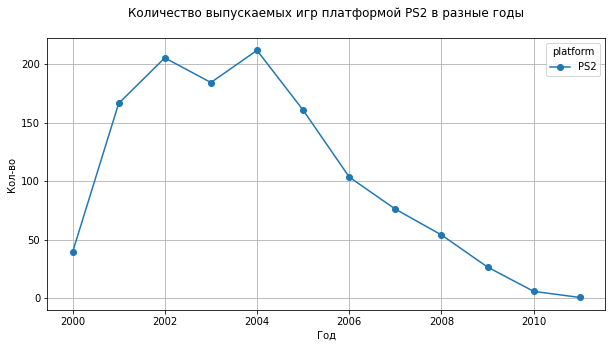

In [33]:
(data
 .query('platform == "PS2"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'PS2', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой PS2 в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Аналогичная ситуация у платформы PS2,  объясняется выходом в 2006 году PS3. По прошествию 5-6 лет, PS2 стала просто неактуальна.

#### Продажи PS3

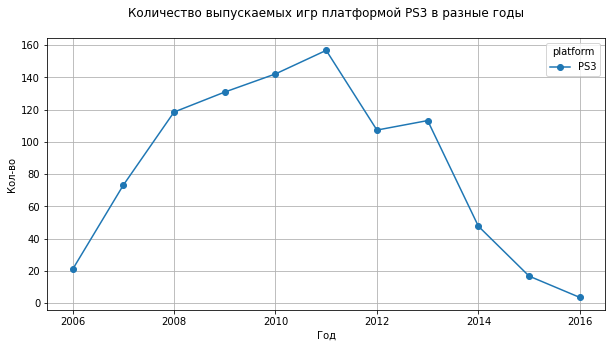

In [34]:
(data
 .query('platform == "PS3"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'PS3', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой PS3 в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

У PS3 в течение 5 лет наблюдался рост продаж, но в 2012 вышел анонс PS4, а в 2013 новая платформа вышла в продажу. Как и с предыдущими платформами, по прошествию 3-4 лет, PS3 стала более неактуальна в продажах, но на руках у пользователей осталось довольно много экземпляров.

#### Продажи PSP

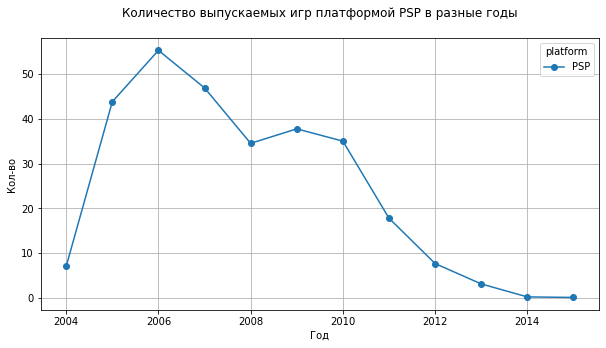

In [35]:
(data
 .query('platform == "PSP"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'PSP', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой PSP в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

У PSP не было аналогов, соответственно наблюдался рост продаж, но в 2010 вышел анонс PSV, а в 2011 новая платформа вышла в продажу. Как и с предыдущими платформами, по прошествию 3-4 лет, PSP стала более неактуальна.

#### Продажи Wii

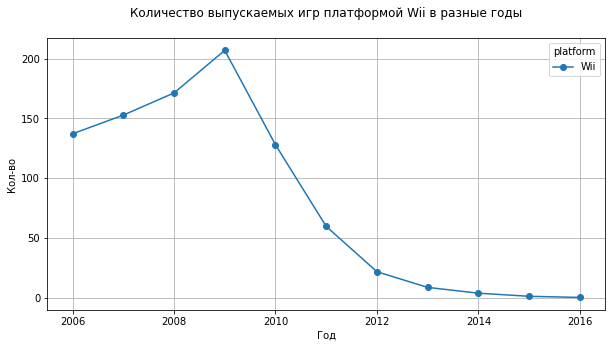

In [36]:
(data
 .query('platform == "Wii"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'Wii', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой Wii в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Wii была первой игровой консолью поддерживающей HD графику. Как и с предыдущими платформами, спад продаж и прекращение производства произошло на фоне выпуска WiiU

#### Продажи X360

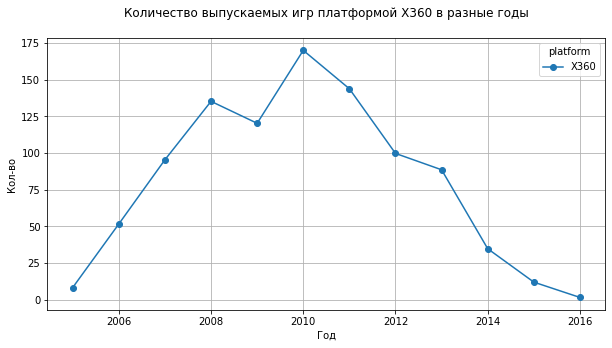

In [37]:
(data
 .query('platform == "X360"').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'X360', style = 'o-')
)
plt.title('Количество выпускаемых игр платформой X360 в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Аналогичная ситуация с X360 от Microsoft, анонс его приемницы XOne был в 2013 году, а в 2014 уже был первый выпуск. На данный момент неактуальна для пользователей в продажах, но аналогично с PS3, на руках у пользователей осталось много действующих консолей.

#### Продажи по ТОР - платформам

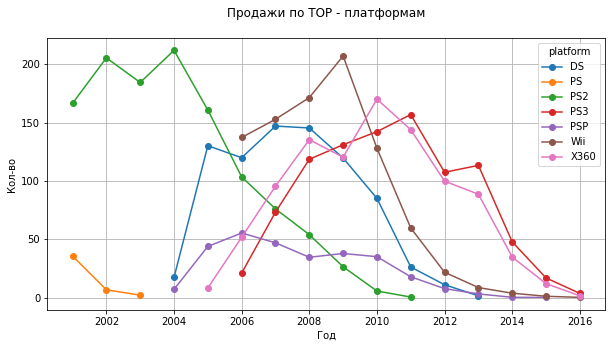

In [38]:
top_platform = ['DS', 'PS', 'PS2', 'PS3', 'PSP', 'Wii', 'X360'] 
(data
 .query('year > 2000 and platform in @top_platform').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), label = 'X360', style = 'o-')
)
plt.title('Продажи по ТОР - платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

Все вышеперечисленные платформы не являются актуальными для пользователей, т.к. на их место пришли новинки. Поэтому есть смысл рассмотреть данные начиная с 2013 года, т.к. основная часть исследуемых платформ заканчивает свой выпуск ближе к 2013-2014 гг.

### Количество продаж с 2013 года

In [39]:
data_new = data.loc[data.loc[:, 'year'] >= 2013]

data_new['rating'] = data_new['rating'].fillna('unknown')

data_new.info()
data_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2233 non-null   object 
 1   platform      2233 non-null   object 
 2   year          2233 non-null   int64  
 3   genre         2233 non-null   object 
 4   na_sales      2233 non-null   float64
 5   eu_sales      2233 non-null   float64
 6   jp_sales      2233 non-null   float64
 7   other_sales   2233 non-null   float64
 8   critic_score  991 non-null    float64
 9   user_score    1192 non-null   float64
 10  rating        2233 non-null   object 
 11  all_sales     2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


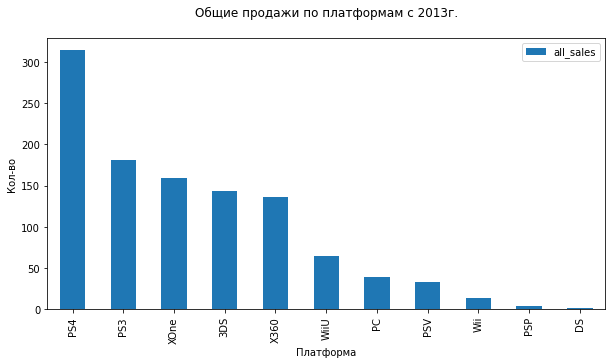

In [40]:
(data_new
 .pivot_table(index = 'platform', values='all_sales', aggfunc = 'sum')
 .sort_values(by = 'all_sales', ascending = False)
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Общие продажи по платформам c 2013г.'+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Кол-во')
plt.show()

По данным с 2013 года, видно, что лидерами продаж (более 100) являются 3DS, PS4, PS3, X360, XOne.

#### Продажи по ТОР-платформам с 2013г.

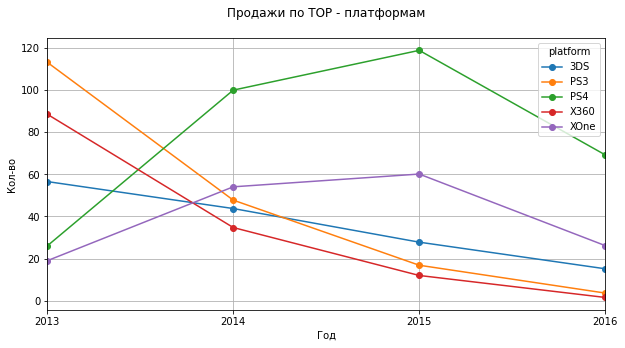

In [41]:
top_platform = ['3DS', 'PS3', 'PS4', 'X360', 'XOne'] 
(data_new
 .query('platform in @top_platform').reset_index()
 .pivot_table(index = 'year', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
 .plot(grid = True, kind='line', figsize=(10,5), style = 'o-', xlim = (2013, 2016))
)
plt.xticks([2013,2014,2015,2016])
plt.title('Продажи по ТОР - платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.show()

По графику видно, что по продажам на 2016 год лидируют PS4 и XOne. Они являются основными конкурентами и PS4 лидирует. На графике показан спад по 2016 г., но важно учитывать, что за 2016 год, данные могут быть еще не полными, т.к. год не закрыт.

#### "Ящик с усами" по ТОР-платформам с 2013г.

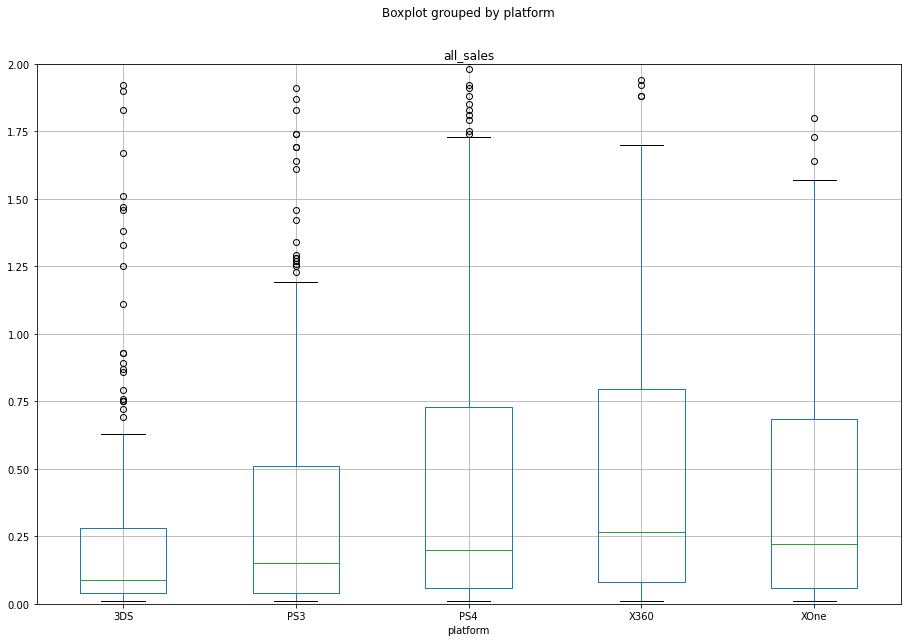

In [42]:
top_platform = ['3DS', 'PS3', 'PS4', 'X360', 'XOne'] 
(data_new
 .query('platform in @top_platform').reset_index()
 .boxplot(column = 'all_sales', by = 'platform', figsize=(15,10)))
plt.ylim(0,2)
plt.show()

Наибольшее из наблюдаемых значений которое не является выбросом у всех платформ не превышает 2. Медианное значение PS4 и XOne не превышает 0.25, у X360 чуть выше, у 3DS около 0.10, у PS3 0.13. Третий квартиль у PS4, X360 и XOne от 0.65 до 0.80, у 3DS 0.30, у PS3 чуть больше 0.50. Данные PS4, XOne и X360 более ровно распределены.

### Влияние отзывов на продажи платформ

#### Влияние отзывов на продажи платформ PS4

Посмотрим, насколько отзывы пользователей и критиков влияют на продажи.

In [43]:
ps4 = data_new.loc[data_new.loc[:, 'platform'] == 'PS4']

Корреляция: 0.40656790206178095

Влияние отзывов критиков на продажи


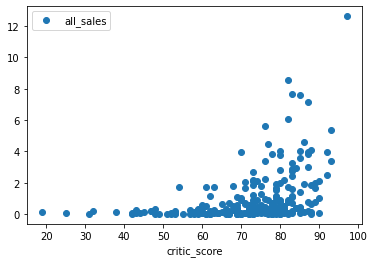

In [44]:
ps4.plot(x = 'critic_score', y = 'all_sales', style='o')
print('Корреляция:', ps4['critic_score'].corr(ps4['all_sales']))
print('')
print('Влияние отзывов критиков на продажи')

Корреляция: -0.031957110204556376

Влияние отзывов пользователей на продажи


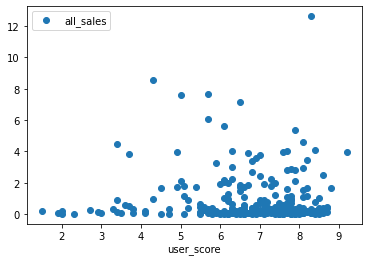

In [45]:
ps4.plot(x = 'user_score', y = 'all_sales', style='o')
print('Корреляция:', ps4['user_score'].corr(ps4['all_sales']))
print('')
print('Влияние отзывов пользователей на продажи')

Отзывы критиков и пользователей не влияют на продажи.

#### Влияние отзывов на продажи платформ 3DS

In [46]:
ds3 = data_new.loc[data_new.loc[:, 'platform'] == '3DS']

Корреляция: 0.3570566142288103

Влияние отзывов критиков на продажи


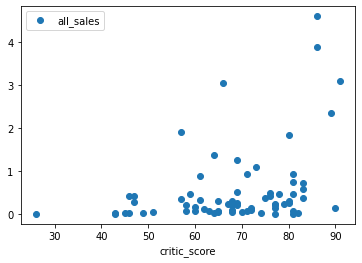

In [47]:
ds3.plot(x = 'critic_score', y = 'all_sales', style='o')
print('Корреляция:', ds3['critic_score'].corr(ds3['all_sales']))
print('')
print('Влияние отзывов критиков на продажи')

Корреляция: 0.24150411773563016

Влияние отзывов пользователей на продажи


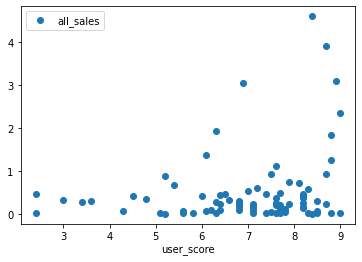

In [48]:
ds3.plot(x = 'user_score', y = 'all_sales', style='o')
print('Корреляция:', ds3['user_score'].corr(ds3['all_sales']))
print('')
print('Влияние отзывов пользователей на продажи')

#### Влияние отзывов на продажи платформ PS3

In [49]:
ps3 = data_new.loc[data_new.loc[:, 'platform'] == 'PS3']

Корреляция: 0.3342853393371919

Влияние отзывов критиков на продажи


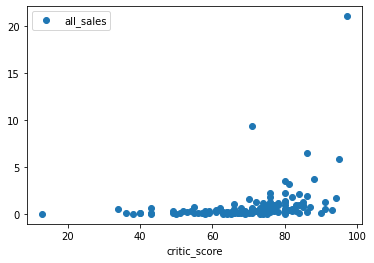

In [50]:
ps3.plot(x = 'critic_score', y = 'all_sales', style='o')
print('Корреляция:', ps3['critic_score'].corr(ps3['all_sales']))
print('')
print('Влияние отзывов критиков на продажи')

Корреляция: 0.0023944027357566925

Влияние отзывов пользователей на продажи


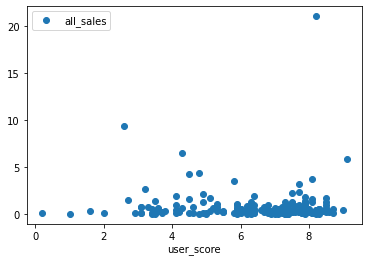

In [51]:
ps3.plot(x = 'user_score', y = 'all_sales', style='o')
print('Корреляция:', ps3['user_score'].corr(ps3['all_sales']))
print('')
print('Влияние отзывов пользователей на продажи')

#### Влияние отзывов на продажи платформ X360

In [52]:
x360 = data_new.loc[data_new.loc[:, 'platform'] == 'X360']

Корреляция: 0.3503445460228664

Влияние отзывов критиков на продажи


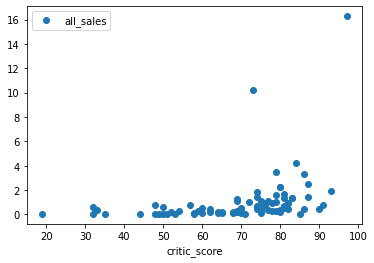

In [53]:
x360.plot(x = 'critic_score', y = 'all_sales', style='o')
print('Корреляция:', x360['critic_score'].corr(x360['all_sales']))
print('')
print('Влияние отзывов критиков на продажи')

Корреляция: -0.011742185147181342

Влияние отзывов пользователей на продажи


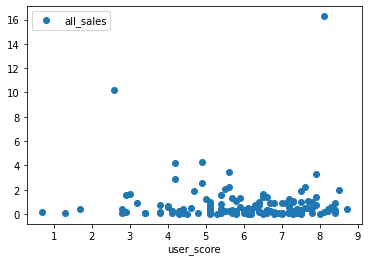

In [54]:
x360.plot(x = 'user_score', y = 'all_sales', style='o')
print('Корреляция:', x360['user_score'].corr(x360['all_sales']))
print('')
print('Влияние отзывов пользователей на продажи')

#### Влияние отзывов на продажи платформ XOne

In [55]:
xone = data_new.loc[data_new.loc[:, 'platform'] == 'XOne']

Корреляция: 0.4169983280084017

Влияние отзывов критиков на продажи


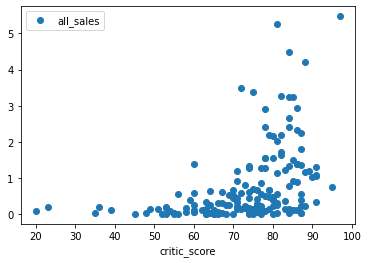

In [56]:
xone.plot(x = 'critic_score', y = 'all_sales', style='o')
print('Корреляция:', xone['critic_score'].corr(xone['all_sales']))
print('')
print('Влияние отзывов критиков на продажи')

Корреляция: -0.06892505328279414

Влияние отзывов пользователей на продажи


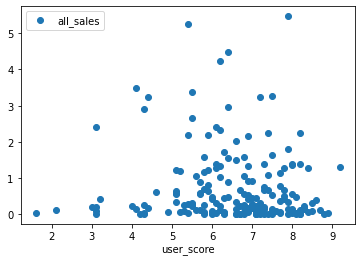

In [57]:
xone.plot(x = 'user_score', y = 'all_sales', style='o')
print('Корреляция:', xone['user_score'].corr(xone['all_sales']))
print('')
print('Влияние отзывов пользователей на продажи')

По рассчетам корреляции и диаграммам рассеяния видно, что зависимость между отзывами и продажами по топовым платформам очень слабая. Отзывы не влияют на продажи.

### Общее распределение игр по жанрам

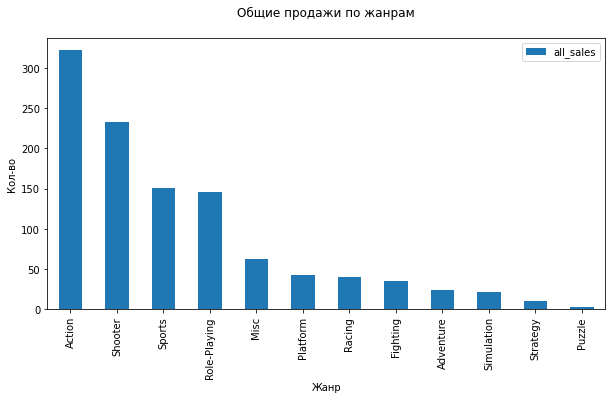

In [58]:
(data_new
 .pivot_table(index = 'genre', values='all_sales', aggfunc = 'sum')
 .sort_values(by = 'all_sales', ascending = False)
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Общие продажи по жанрам'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Кол-во')
plt.show()

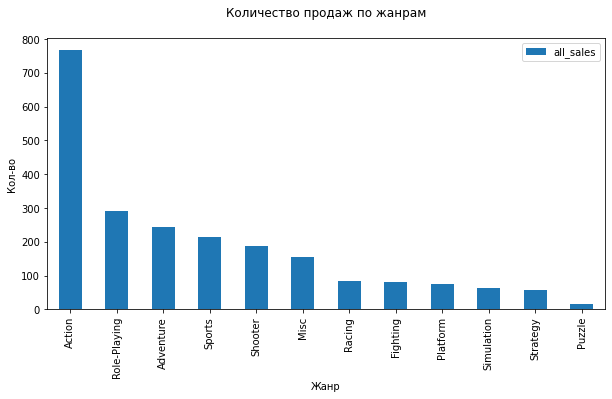

In [59]:
(data_new
 .pivot_table(index = 'genre', values='all_sales', aggfunc = 'count')
 .sort_values(by = 'all_sales', ascending = False)
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Количество продаж по жанрам'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Кол-во')
plt.show()

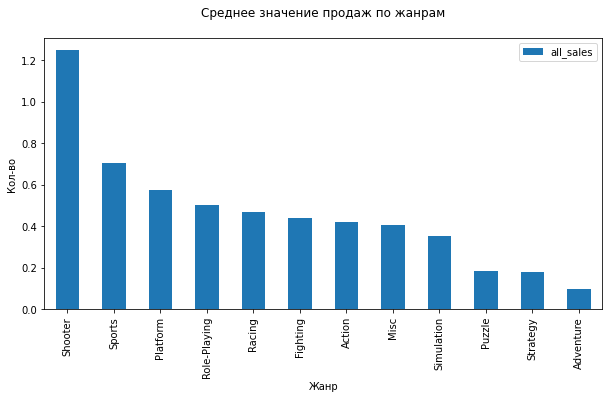

In [60]:
(data_new
 .pivot_table(index = 'genre', values='all_sales', aggfunc = 'mean')
 .sort_values(by = 'all_sales', ascending = False)
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Среднее значение продаж по жанрам'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Кол-во')
plt.show()

По соотношению количества выпуска и продаж за последние 3 года лидирующими жанрами являются Shooter и Sports.

## Портрет пользователя по регионам

### Общие покатели по платформам и жанрам

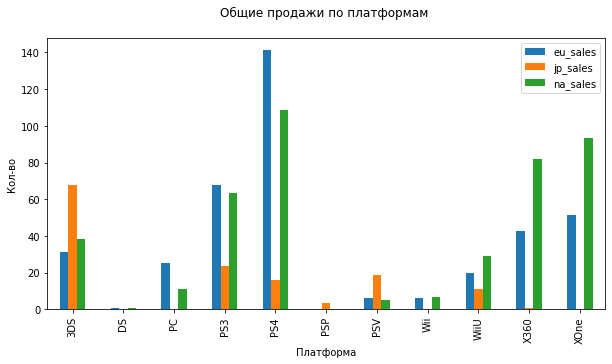

In [61]:
(data_new
 .pivot_table(index = 'platform', values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Общие продажи по платформам '+ "\n")
plt.xlabel('Платформа')
plt.ylabel('Кол-во')
plt.show()

В Америке и Европе показатели, по популярности платформ похожи между собой, в основном лидируют игровые приставки PS4 и PS3, а так же X360 и XOne. Япония отличается своими предпочтениями, портативная игровая система 3DS наиболее популярна у пользователей. 

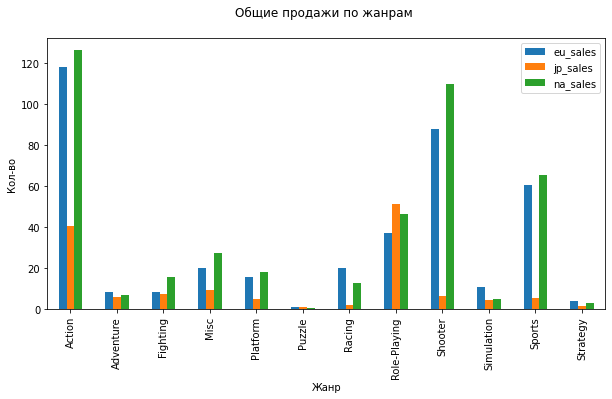

In [62]:
(data_new
 .pivot_table(index = 'genre', values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
 .plot(kind='bar', figsize=(10,5))
)
plt.title('Общие продажи по жанрам '+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Кол-во')
plt.show()

По жанрам аналогичная ситуация. В Америке и Европе показатели, по популярности жанров похожи между собой, в основном лидируют экшен и шутер игры. Япония отличается своими предпочтениями, наиболее популярными жанрами у пользователей являются ролевые и экшен игры. 

### ТОР - продажи по регионам

Index(['PS4', 'XOne', 'X360', 'PS3', '3DS'], dtype='object', name='platform')


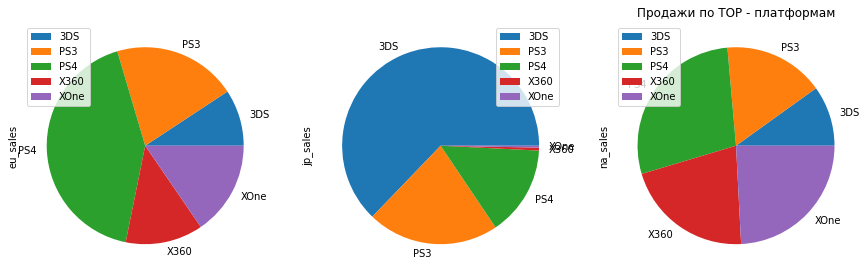

In [63]:
sales_by_platform = data_new.pivot_table(index = 'platform', values=['na_sales','eu_sales','jp_sales'], 
aggfunc = 'sum').sort_values('na_sales', ascending=False)
top_platform_new = sales_by_platform.head().index
print(top_platform_new)

(data_new
 .query('platform in @top_platform_new').reset_index()
 .pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
 .plot.pie(subplots=True, figsize=(15,10))
)
plt.title('Продажи по ТОР - платформам')
plt.show()

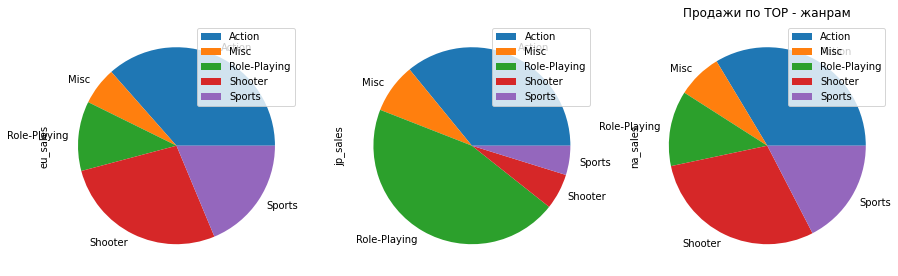

In [64]:
sales_by_genre = data_new.pivot_table(index = 'genre', values=['na_sales','eu_sales','jp_sales'], 
aggfunc = 'sum').sort_values('na_sales', ascending=False)
top_genre_new = sales_by_genre.head().index

(data_new
 .query('genre in @top_genre_new').reset_index()
 .pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
 .plot.pie(subplots=True, figsize=(15,10))
)
plt.title('Продажи по ТОР - жанрам')
plt.show()

### Рейтинг ESRB

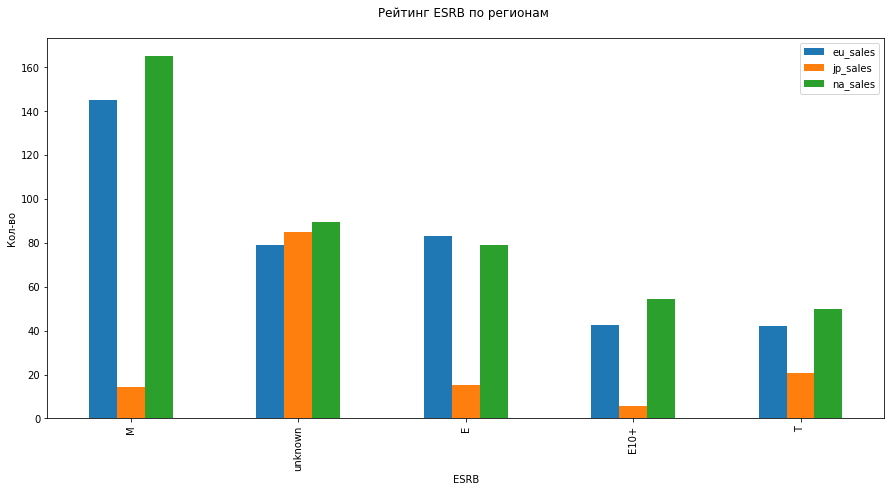

In [65]:
(data_new
 .pivot_table(index = 'rating', values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending = False)
 .plot(kind='bar', figsize=(15,7))
)
plt.title('Рейтинг ESRB по регионам '+ "\n")
plt.xlabel('ESRB')
plt.ylabel('Кол-во')
plt.show()

В Америке и Европе рейтинг ESRB влияет на продажи в отличии от Японии. В Японии большая часть игр была продана без указания этого рейтинга.

## Проверка гипотез

### Гипотеза №1
###### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Выборки независимые. Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не различаются. Альтернативная гипотеза-средние пользовательские рейтинги платформ различаются.

In [66]:
xone = data_new.loc[data_new.loc[:, 'platform'] == 'XOne']
pc = data_new.loc[data_new.loc[:, 'platform'] == 'PC']

xone = xone.dropna()
pc = pc.dropna()

xone['user_score'] = xone['user_score'].astype('float64')
pc['user_score'] = pc['user_score'].astype('float64')
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          148 non-null    object 
 1   platform      148 non-null    object 
 2   year          148 non-null    int64  
 3   genre         148 non-null    object 
 4   na_sales      148 non-null    float64
 5   eu_sales      148 non-null    float64
 6   jp_sales      148 non-null    float64
 7   other_sales   148 non-null    float64
 8   critic_score  148 non-null    float64
 9   user_score    148 non-null    float64
 10  rating        148 non-null    object 
 11  all_sales     148 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 15.0+ KB


In [67]:
alpha = .05
results = stats.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)
print('р-значение =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение = 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


### Гипотеза №2
###### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Выборки независимые.
Нулевая гипотеза-средние пользовательские рейтинги жанров неразличаются.
Альтернативная гипотеза-Средние пользовательские рейтинги жанров различаются.

In [68]:
action = data_new.loc[data_new.loc[:, 'genre'] == 'Action']
sports = data_new.loc[data_new.loc[:, 'genre'] == 'Sports']

action = action.dropna()
sports = sports.dropna()

action['user_score'] = action['user_score'].astype('float64')
sports['user_score'] = sports['user_score'].astype('float64')

In [69]:
alpha = .05
results = stats.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)
print('р-значение =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение = 1.0496920005008588e-13
Отвергаем нулевую гипотезу


## Вывод

После исследовательского анализа данных по продажам Интернет-магазина «Стримчик» можно сделать выводы:

1. Выявленна закономерность по актуальности продукта, т.е. чем новее поколение игровой консоли, тем актуальнее игры для нее. 

2. В основном пользователи Америки и Европы отдают предпочтение игровым приставкам PS4 и XOne. Пользователи Азии, на примере Японии, отдают предпочтение портотивным игровым системам на 2016 год такой системой является 3DS.

3. Общий показатель 3DS падает, т.к. все чаще данные портотивные игровые системы заменяют смартфоны. Популярность их в Японии может объясняться низкими жилищными возможностями (совреиенная игровая приставка подразумевает наличие большого TV и хороших графических характеристик) и стандартами по кв.м. Т.к. по статистике в Японии довольно миниатюрные квартиры и срендняя квадратура на человека,  составляет не более 12 кв.м., тогда как в Европе это около 50 кв.м., а в Северной Америке более 60 кв.

4. По анализу данных за последние 3 года, можно сделать вывод об актуальности на данный момент таких игровых приставок как PS4 и XOne.

5. Отзывы критиков и пользователей не влияют на продажи.

6. По соотношению количества выпуска и продаж за последние 3 года лидирующими игровыми жанрами являются Shooter и Sports.

7. В Америке и Европе возрастной рейтинг ESRB влияет на продажи в отличии от Японии. В Японии большая часть игр была продана без указания этого рейтинга.

На данный момент для планирования рекламной компании наиболее потнциально популярными продуктами являются PS4 и XOne. 